In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np


In [4]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars=pd.DataFrame(cars,columns=["HP","VOL","SP","WT","HPG"])
cars.head()

,HP,VOL,SP,WT,HPG
0,49,89,104.185353,28.762059,NaN
1,55,92,105.461264,30.466833,NaN
2,55,92,105.461264,30.193597,NaN
3,70,92,113.461264,30.632114,NaN
4,53,92,104.461264,29.889149,NaN


**EDA**

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   HPG     0 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
#check for missing values
cars.isna().sum()

HP      0
VOL     0
SP      0
WT      0
HPG    81
dtype: int64

**Observations about info(),missing values**
    -There are no missing values
    -There are 81 observations(81 different cars data)
    -The data types of the columns are also relevant and valid

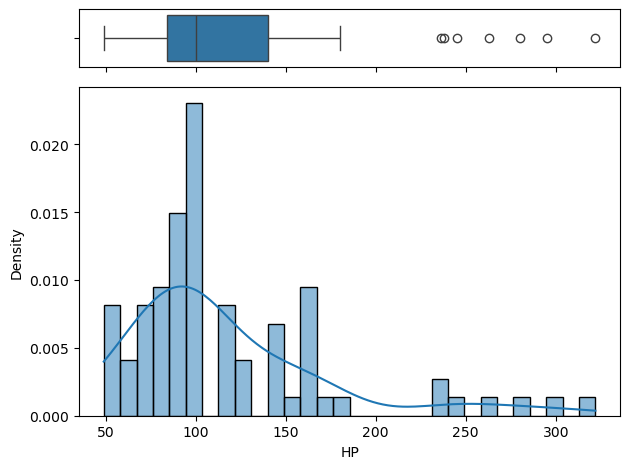

In [10]:
fig,(ax_box,ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars, x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

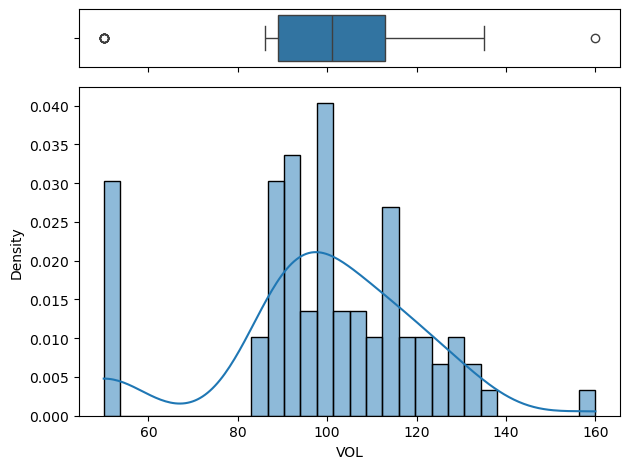

In [11]:
fig,(ax_box,ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars, x='VOL',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='VOL',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

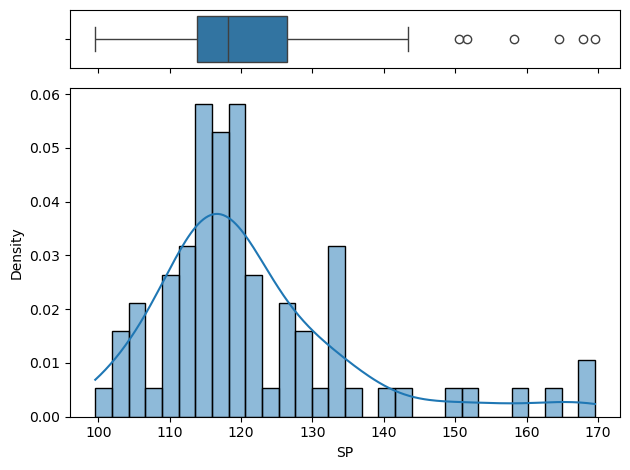

In [12]:
fig,(ax_box,ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars, x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

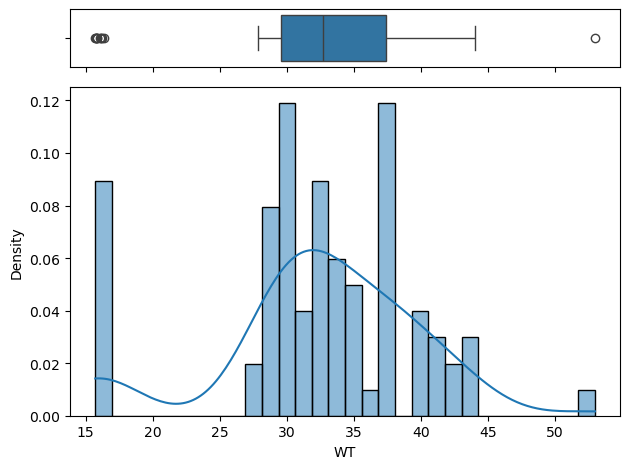

In [13]:
fig,(ax_box,ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars, x='WT',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='WT',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

Oservations from boxplot and histograms
-There are some extreme values (outilers) observed in towards the right tail of SP and HP distributions.
-In VOL and WT columns, afew outliers are observed in both tails of their distributions.
-The extreme values of cars data may have come from the specially designed nature of cars.
-As this multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

In [21]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,HPG


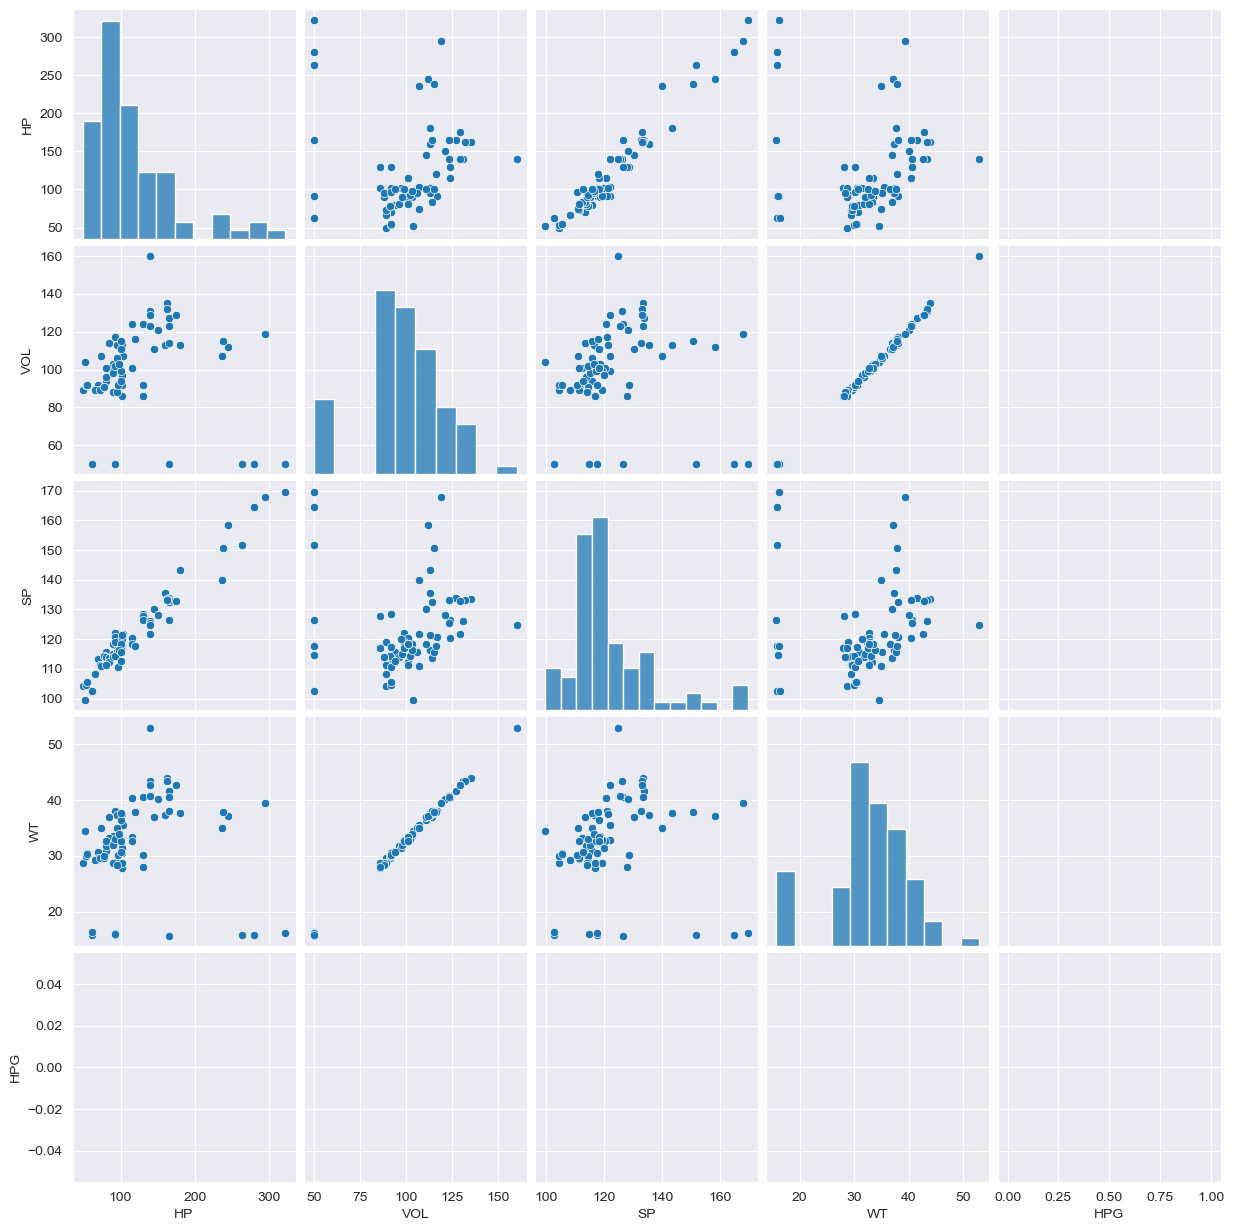

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)